# 2580 스도쿠

### Q)
    스도쿠는 18세기 스위스 수학자가 만든 '라틴 사각형'이랑 퍼즐에서 유래한 것으로 현재 많은 인기를 누리고 있다. 이 게임은 아래 그림과 같이 가로, 세로 각각 9개씩 총 81개의 작은 칸으로 이루어진 정사각형 판 위에서 이뤄지는데, 게임 시작 전 일부 칸에는 1부터 9까지의 숫자 중 하나가 쓰여 있다.

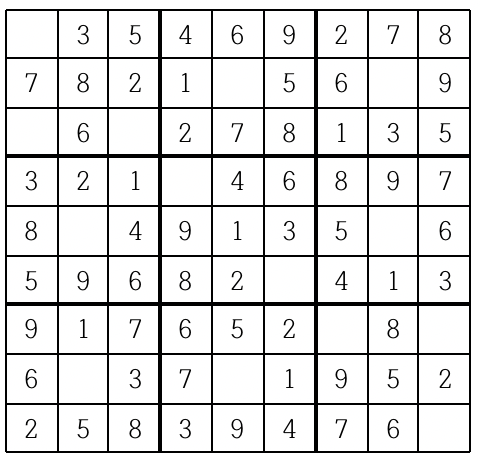

    나머지 빈 칸을 채우는 방식은 다음과 같다.

    1. 각각의 가로줄과 세로줄에는 1부터 9까지의 숫자가 한 번씩만 나타나야 한다.
    2. 굵은 선으로 구분되어 있는 3x3 정사각형 안에도 1부터 9까지의 숫자가 한 번씩만 나타나야 한다.

    위의 예의 경우, 첫째 줄에는 1을 제외한 나머지 2부터 9까지의 숫자들이 이미 나타나 있으므로 첫째 줄 빈칸에는 1이 들어가야 한다.

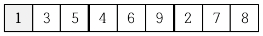

    또한 위쪽 가운데 위치한 3x3 정사각형의 경우에는 3을 제외한 나머지 숫자들이 이미 쓰여있으므로 가운데 빈 칸에는 3이 들어가야 한다.

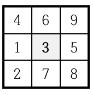

    이와 같이 빈 칸을 차례로 채워 가면 다음과 같은 최종 결과를 얻을 수 있다.

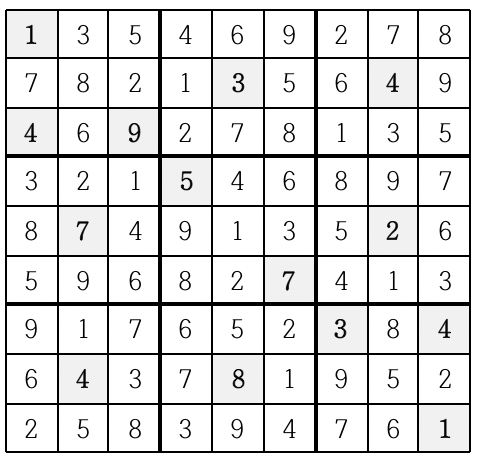

    게임 시작 전 스도쿠 판에 쓰여 있는 숫자들의 정보가 주어질 때 모든 빈 칸이 채워진 최종 모습을 출력하는 프로그램을 작성하시오.

### Input)
    아홉 줄에 걸쳐 한 줄에 9개씩 게임 시작 전 스도쿠판 각 줄에 쓰여 있는 숫자가 한 칸씩 띄워서 차례로 주어진다. 스도쿠 판의 빈 칸의 경우에는 0이 주어진다. 스도쿠 판을 규칙대로 채울 수 없는 경우의 입력은 주어지지 않는다.

### Output)
    모든 빈 칸이 채워진 스도쿠 판의 최종 모습을 아홉 줄에 걸쳐 한 줄에 9개씩 한 칸씩 띄워서 출력한다.
    스도쿠 판을 채우는 방법이 여럿인 경우는 그 중 하나만을 출력한다.

In [ ]:
from sys import stdin
input = stdin.readline

blank = []
graph = []

for i in range(9):
    graph.append(list(map(int, input().strip().split())))

for i in range(9):
    for j in range(9):
        if graph[i][j] == 0:
            blank.append((i, j))

def check_row(x, a):
    for i in range(9):
        if a == graph[x][i]:
            return 0
        
    return 1

def check_col(y, a):
    for i in range(9):
        if a == graph[i][y]:
            return 0
        
    return 1

def check_rec(x, y, a):
    nx = x // 3 * 3
    ny = y // 3 * 3

    for i in range(3):
        for j in range(3):
            if graph[nx+i][ny+j] == a:
                return 0
            
    return 1

def dfs(idx):
    if idx == len(blank):
        for i in range(9):
            print(*graph[i])
        exit(0) # return을 하면 또 다른 결과를 출력하게 되는 것 같다.
                # 따라서 그냥 exit(0)를 통해 한 번 출력하고 종료하는 것이 맞다
    
    for i in range(1, 10):
        x = blank[idx][0]
        y = blank[idx][1]

        if check_row(x, i) and check_col(y, i) and check_rec(x, y, i):
            graph[x][y] = i
            dfs(idx+1)
            graph[x][y] = 0

dfs(0)

1. 빈 칸은 0으로 주어지기 때문에 해당 위치의 정보를 blank라는 리스트에 담는다
2. 첫 빈칸에 1~9까지의 수 중 넣을 수 있는 수를 임의로 넣는다.
3. 임의로 넣은 수가 같은 행에 없는지(check_row), 같은 열에 없는지(check_col), 사각형 내에 없는지(check_rec)을 통해 확인한 후 없다면 해당 값을 넣는다
4. 그 다음 빈 칸에 대해서도 같은 방법을 수행한다.
5. idx 값이 blank의 길이 값과 같아지면 모두 값이 들어간 것을 의미하므로 출력 후 종료한다.

출력할 때

    *list를 하면 자동으로 대괄호, 쉼표 등을 없애준다.